# Parte práctica del segundo parcial de Estadística I.
## Integrantes
* Brayan Isaac Vásquez Portocarrero
* Daniel Eduardo Naranjo Garzón
* Nadie más...

## Objetivos
* Gráficos para datos unviariados cuantitativos
* Determinar las medidas descriptivas para datos datos univariados cuantitativos

In [1]:
#Importación de paquetes usados
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.linear_model import *
from scipy.stats import *
from sympy import *

In [4]:
ruta_archivo = '/content/drive/MyDrive/Universidad/Cuarto semestre/Estadística/git-estproy02/nac2020.csv'
columnas_necesarias = ['COD_DPTO', 'EDAD_PADRE', 'N_EMB']
tabla = pd.read_csv(ruta_archivo, sep=',', index_col=0, encoding='latin-1', usecols=columnas_necesarias)
print(tabla.head(4))

          N_EMB  EDAD_PADRE
COD_DPTO                   
44            1          20
44            1          20
44            1          20
44            1          20


In [5]:
df = tabla[["EDAD_PADRE", "N_EMB"]]
df1 = df[(df.EDAD_PADRE != 999) & (df.N_EMB != 99)]
df1.head(4)

,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1
44,20,1


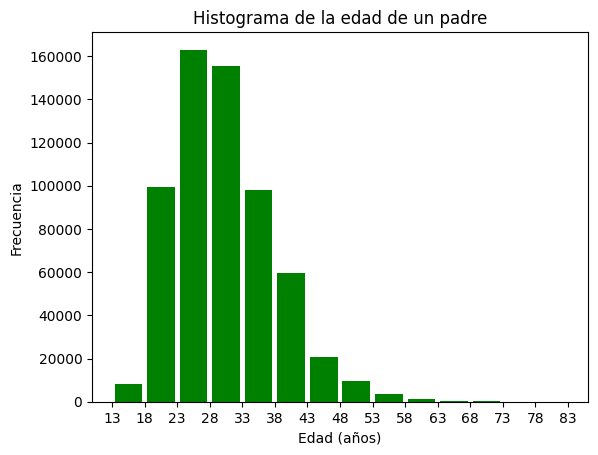

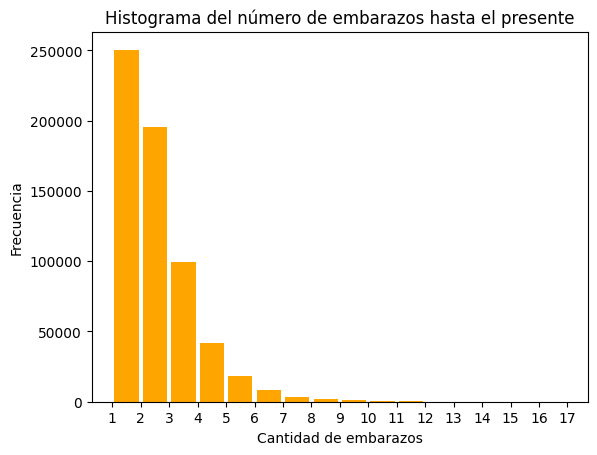

In [6]:
intervalos = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE), 5)
plt.hist(df1.EDAD_PADRE, bins=intervalos, color='green', rwidth=0.85)
plt.title('Histograma de la edad de un padre')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.xticks(intervalos)
plt.show()

intervalos_nemb = range(min(df1.N_EMB), max(df1.N_EMB)+1, 1)
plt.hist(df1.N_EMB, bins=intervalos_nemb, color='orange', rwidth=0.85)
plt.title('Histograma del número de embarazos hasta el presente')
plt.xlabel('Cantidad de embarazos')
plt.ylabel('Frecuencia')
plt.xticks(intervalos_nemb)
plt.show()

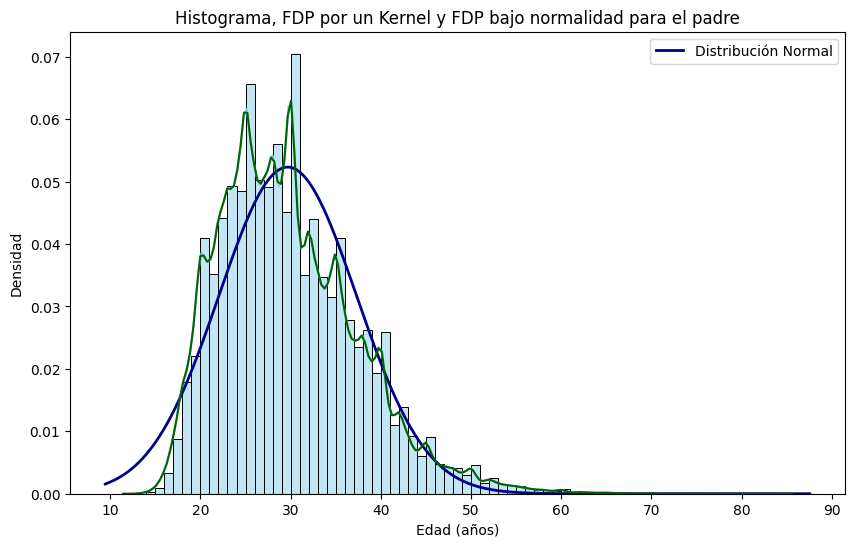

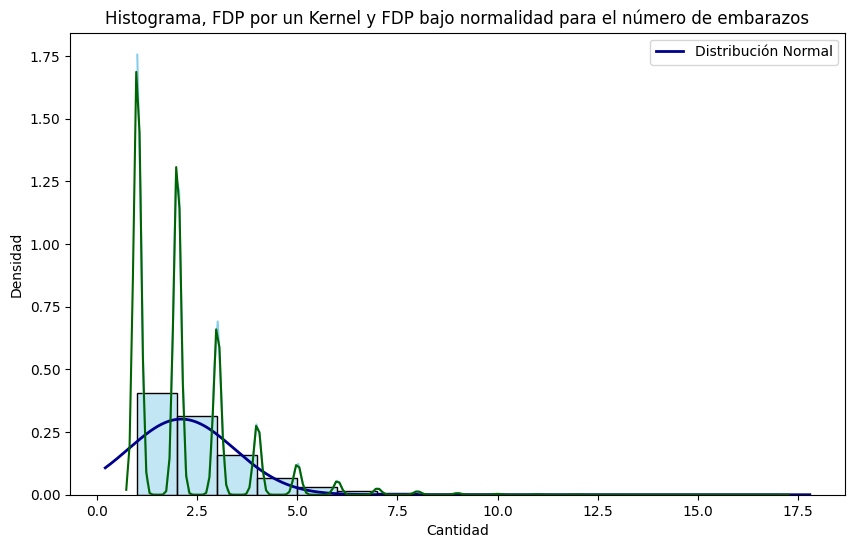

In [7]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE))
plt.plot(x, p, color="darkblue", linewidth=2, label='Distribución Normal')
sns.kdeplot(x=df1.EDAD_PADRE, color = "darkgreen")
plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad para el padre')
plt.xlabel('Edad (años)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

intervalos2 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos2, kde = True, stat = "density", color = "skyblue", edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB))
plt.plot(x, p, color="darkblue", linewidth=2, label='Distribución Normal')
sns.kdeplot(x=df1.N_EMB, color = "darkgreen")
plt.title('Histograma, FDP por un Kernel y FDP bajo normalidad para el número de embarazos')
plt.xlabel('Cantidad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Sea $X:=$ "Edad del padre de un recién nacido en Colombia" y $Y:=$ "Número de embarazos incluido el presente de una madre en Colombia"

Descriptivamente como la función de densidad de probabilidad de los datos estimada por un método Kernel (línea cyan) no coincide con la función de densidad de probabilidad asumiendo el supuesto de normalidad (línea azul), $X\sim \text{Normal} (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad para la variable aleatoria X.

De forma análoga, no asumimos normalidad para la variable aleatoria Y.

In [10]:
print(f'Shapiro para la variable EDAD_PADRE: {shapiro(df1.EDAD_PADRE)}\nShapiro para la variable N_EMB: {shapiro(df1.N_EMB)}\n')
df1.EDAD_PADRE.count()
df1.N_EMB.count()
print(f'Note que la variable EDAD_PADRE trabaja con {len(df1.EDAD_PADRE)} datos,\n mientras que para la variable N_EMB se trabajan con {len(df1.N_EMB)} datos.\n')

Shapiro para la variable EDAD_PADRE: ShapiroResult(statistic=0.9589075446128845, pvalue=0.0)
Shapiro para la variable N_EMB: ShapiroResult(statistic=0.7743879556655884, pvalue=0.0)

Note que la variable EDAD_PADRE trabaja con 620089 datos,
 mientras que para la variable N_EMB se trabajan con 620089 datos.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


*   Si el **valor p** en una prueba de hipótesis es menor que 0.05 se rechaza la hipótesis nula con una confianza del 95%
*   Si el **valor p** en una prueba de hipótesis es mayor que 0.05 no se rechaza la hipótesis nula con una confianza del 95%

En nuestro caso particular, tenemos que para la variable `EDAD_PADRE`, $pvalue= 1.055054862132998\times10^{-120} < 0.05$, es decir, se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal. De igual forma, se tiene que para la variable `N_EMB`, $pvalue=7.969573267820397\times10^{-175} < 0.05$, por tanto se presenta la misma conclusión.

In [11]:
idx = np.random.randint(len(df1.EDAD_PADRE), size = 100)
idx1 = np.random.randint(len(df1.N_EMB), size = 100)
print(f'Shapiro para una muestra de la variable EDAD_PADRE: {shapiro(df1.EDAD_PADRE.index[idx])}\nShapiro para una muestra de la variable N_EMB: {shapiro(df1.N_EMB.index[idx1])}\n')

Shapiro para una muestra de la variable EDAD_PADRE: ShapiroResult(statistic=0.8557748198509216, pvalue=1.949782735266581e-08)
Shapiro para una muestra de la variable N_EMB: ShapiroResult(statistic=0.8602792024612427, pvalue=2.8985052580310366e-08)



Para la variable X, como $p= 1.534434592897432\times10^{-7}<0.05$, entonces se rechaza que la variable aleatoria de la edad de un padre de un recién nacido en Colombia presenta distribución normal.

De forma análoga, se da lo mismo para la variable Y, pues $p= 2.266620928462238\times10^{-8}<0.05$.

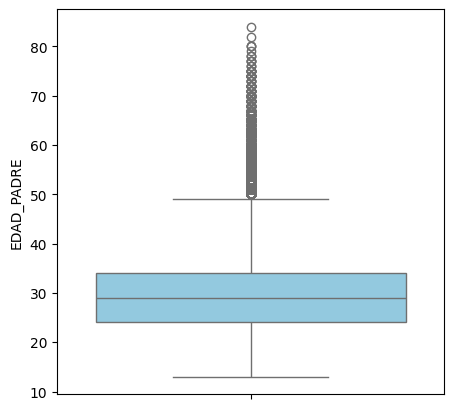

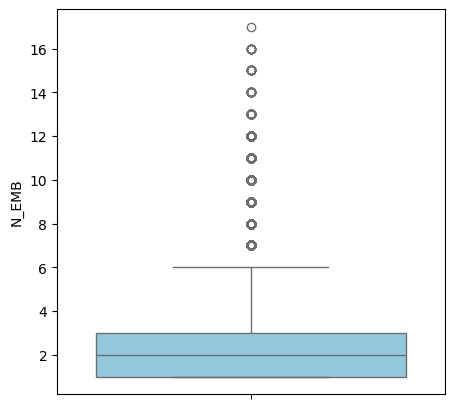

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot(df1.EDAD_PADRE, color='skyblue', saturation=0.75)
plt.show()

plt.figure(figsize=(5, 5))
sns.boxplot(df1.N_EMB, color='skyblue', saturation=0.75)
plt.show()

In [17]:
# Un código adicional
q11, q12, q13, q14 = np.percentile(df1.EDAD_PADRE, [25, 50, 75,95])
q21, q22, q23, q24 = np.percentile(df1.N_EMB, [25, 50, 75, 95])
print(q11, q12, q13, q14, q21, q22, q23, q24)

24.0 29.0 34.0 43.0 1.0 2.0 3.0 5.0


### Análisis de cuartiles

In [ ]:
print(f'- para la viariable X, se considera que la edad de un padre de un recién nacido en Colombia es atípica si es mayor de ')

In [15]:
plt.figure(figsize=(5, 5))
fig = px.strip(df1.EDAD_PADRE, orientation = 'h')
fig.show()

plt.figure(figsize=(5, 5))
fig = px.strip(df1.N_EMB, orientation = 'h')
fig.show()

Output hidden; open in https://colab.research.google.com to view.